In [92]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


In [93]:
df = pd.read_csv('datawithnewcols.csv',index_col = 0)

In [94]:
df.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
1  2014-12-09   538000.0         3       2.25         2570      7242     2.0   
2  2015-02-25   180000.0         2       1.00          770     10000     1.0   
3  2014-12-09   604000.0         4       3.00         1960      5000     1.0   
4  2015-02-18   510000.0         3       2.00         1680      8080     1.0   
5  2014-05-12  1230000.0         4       4.50         5420    101930     1.0   

   waterfront  view  condition  ...     long  sqft_living15  sqft_lot15  \
1         0.0   0.0          3  ... -122.319           1690        7639   
2         0.0   0.0          3  ... -122.233           2720        8062   
3         0.0   0.0          5  ... -122.393           1360        5000   
4         0.0   0.0          3  ... -122.045           1800        7503   
5         0.0   0.0          3  ... -122.005           4760      101930   

   Age_of_House  Years_last_renovation  basement  distance_from_seattle  \
1            69                     29      True              12.613856   
2            87                     87     False              16.333282   
3            55                     55      True              10.617501   
4            33                     33     False              21.759524   
5            19                     19      True              25.295727   

   distance_from_bellevue  distance_from_a_city  distance_from_airport  
1               15.150174             12.613856              30.859494  
2               14.375822             14.375822              33.112379  
3               17.522706             10.617501              10.988905  
4               11.683886             11.683886              27.230991  
5               15.508940             15.508940              32.449837  

[5 rows x 27 columns]

In [95]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Age_of_House', 'Years_last_renovation',
       'basement', 'distance_from_seattle', 'distance_from_bellevue',
       'distance_from_a_city', 'distance_from_airport'],
      dtype='object')

In [96]:
df.corr()['price']

price                     1.000000
bedrooms                  0.322691
bathrooms                 0.505899
sqft_living               0.678364
sqft_lot                  0.094727
floors                    0.280723
waterfront                0.155235
view                      0.346082
condition                 0.037808
grade                     0.681265
sqft_above                0.584112
sqft_basement             0.275532
yr_built                  0.066510
yr_renovated              0.104688
zipcode                  -0.044324
lat                       0.364445
long                      0.041126
sqft_living15             0.599255
sqft_lot15                0.085810
Age_of_House             -0.066510
Years_last_renovation    -0.104688
basement                  0.170285
distance_from_seattle    -0.312331
distance_from_bellevue   -0.451783
distance_from_a_city     -0.431322
distance_from_airport     0.206271
Name: price, dtype: float64

In [126]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Age_of_House', 'Years_last_renovation',
       'basement', 'distance_from_seattle', 'distance_from_bellevue',
       'distance_from_a_city', 'distance_from_airport', 'decades'],
      dtype='object')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19002 entries, 1 to 21596
Data columns (total 27 columns):
date                      19002 non-null object
price                     19002 non-null float64
bedrooms                  19002 non-null int64
bathrooms                 19002 non-null float64
sqft_living               19002 non-null int64
sqft_lot                  19002 non-null int64
floors                    19002 non-null float64
waterfront                19002 non-null float64
view                      19002 non-null float64
condition                 19002 non-null int64
grade                     19002 non-null int64
sqft_above                19002 non-null int64
sqft_basement             19002 non-null float64
yr_built                  19002 non-null int64
yr_renovated              19002 non-null int64
zipcode                   19002 non-null int64
lat                       19002 non-null float64
long                      19002 non-null float64
sqft_living15             19

In [99]:
logcity = np.log(df['distance_from_a_city'])

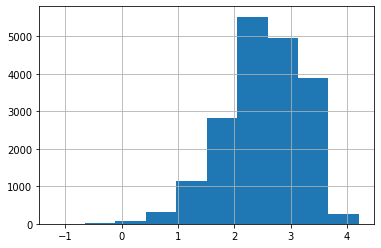

In [100]:
logcity.hist()

In [101]:
# df.drop(columns = ['lat','long','yr_built','yr_renovated','sqft_above','sqft_basement'],axis = 1, inplace = True)

In [102]:
# Explore it
numerical_cols = []
for col in df.columns:
    if df[col].dtype in [np.int64, np.float64]:
        numerical_cols.append(col)

len(numerical_cols), numerical_cols

(25,
 ['price',
  'bedrooms',
  'bathrooms',
  'sqft_living',
  'sqft_lot',
  'floors',
  'waterfront',
  'view',
  'condition',
  'grade',
  'sqft_above',
  'sqft_basement',
  'yr_built',
  'yr_renovated',
  'zipcode',
  'lat',
  'long',
  'sqft_living15',
  'sqft_lot15',
  'Age_of_House',
  'Years_last_renovation',
  'distance_from_seattle',
  'distance_from_bellevue',
  'distance_from_a_city',
  'distance_from_airport'])

In [106]:
numerical_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'Age_of_House',
 'Years_last_renovation',
 'distance_from_seattle',
 'distance_from_bellevue',
 'distance_from_a_city',
 'distance_from_airport']

In [107]:
numericals = numerical_cols.remove('price')

ValueError: list.remove(x): x not in list

# SalesPrice Distribution


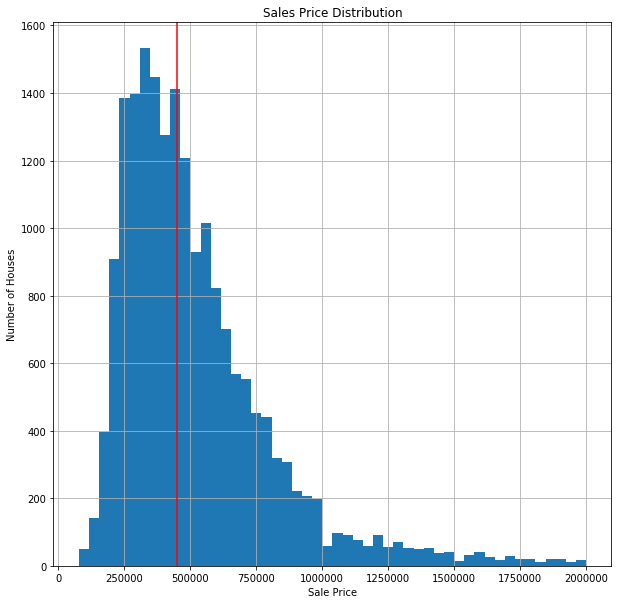

In [108]:

salesprice = df["price"]
salesprice.hist(figsize=(10,10),bins = 50);
plt.title("Sales Price Distribution");
plt.xlabel("Sale Price");
plt.ylabel("Number of Houses");
plt.axvline(salesprice.median(), color = 'red');

# Home Value over the Decades

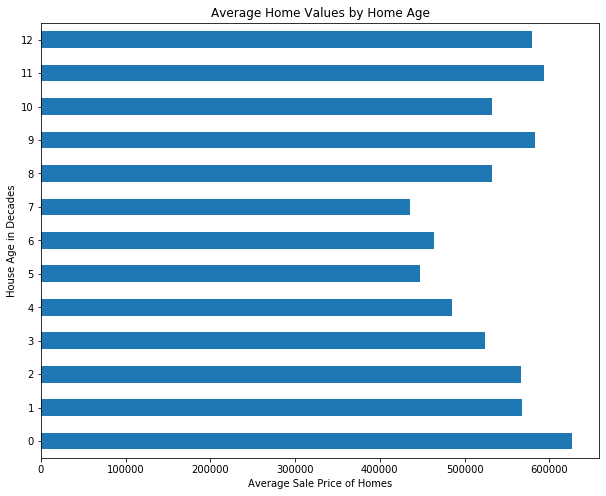

In [109]:

df['decades'] = df['Age_of_House']//10
to_plot = df.groupby('decades')['price'].mean()
to_plot.plot(kind='barh', figsize=(10,8))
plt.ylabel('House Age in Decades')
plt.xlabel('Average Sale Price of Homes')
plt.title('Average Home Values by Home Age');


 # Price by Condition

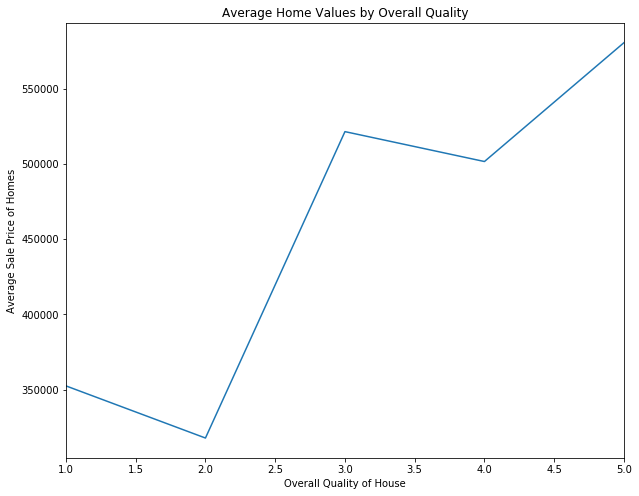

In [110]:
to_plot1 = df.groupby('condition').price.mean()
to_plot1.plot(kind='line', figsize=(10,8))

plt.xlabel('Overall Quality of House')
plt.ylabel('Average Sale Price of Homes')
plt.title('Average Home Values by Overall Quality');

# House Size vs Price with Basement Hue

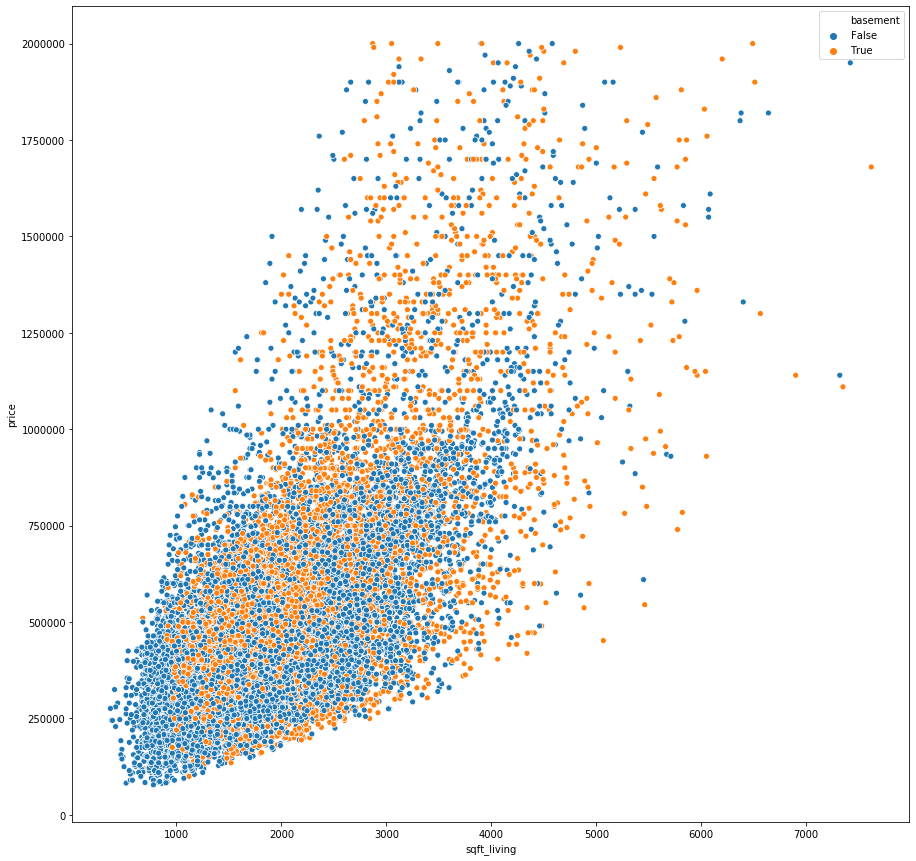

In [111]:
plt.figure(figsize= (15,15))
sns.scatterplot(x='sqft_living', y='price',data=df,hue = 'basement')
plt.show()

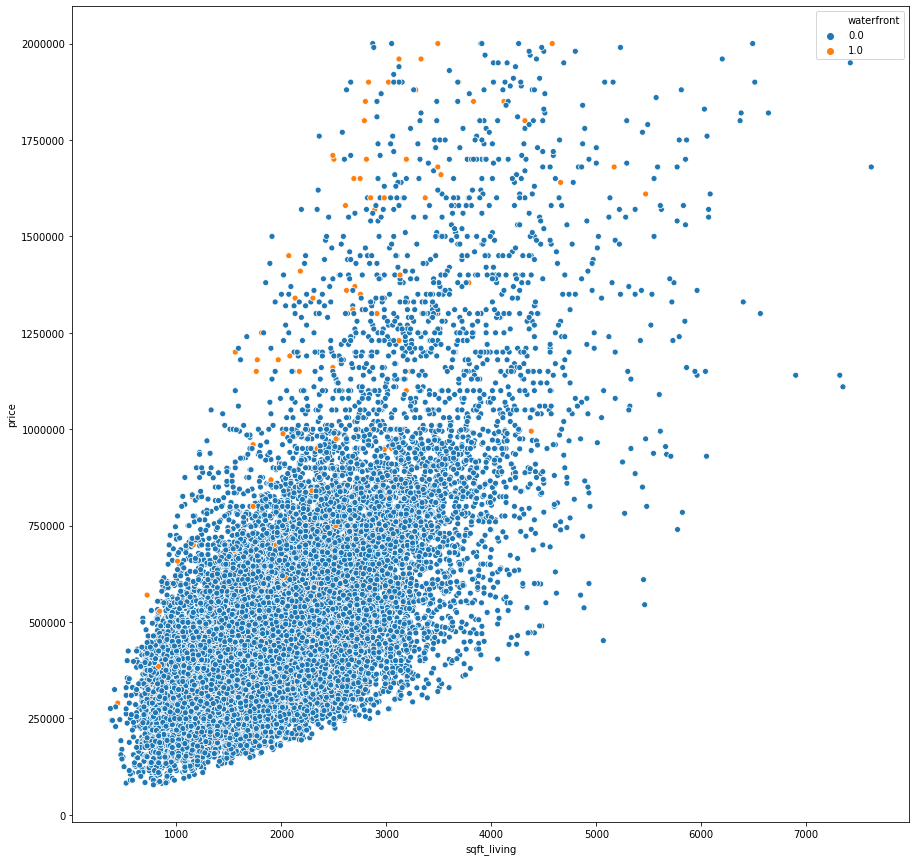

In [112]:
plt.figure(figsize= (15,15))
sns.scatterplot(x='sqft_living', y='price',data=df,hue = 'waterfront')
plt.show()

In [127]:
df['long']

1       -122.319
2       -122.233
3       -122.393
4       -122.045
5       -122.005
          ...   
21591   -122.409
21592   -122.346
21593   -122.362
21594   -122.299
21596   -122.299
Name: long, Length: 19002, dtype: float64

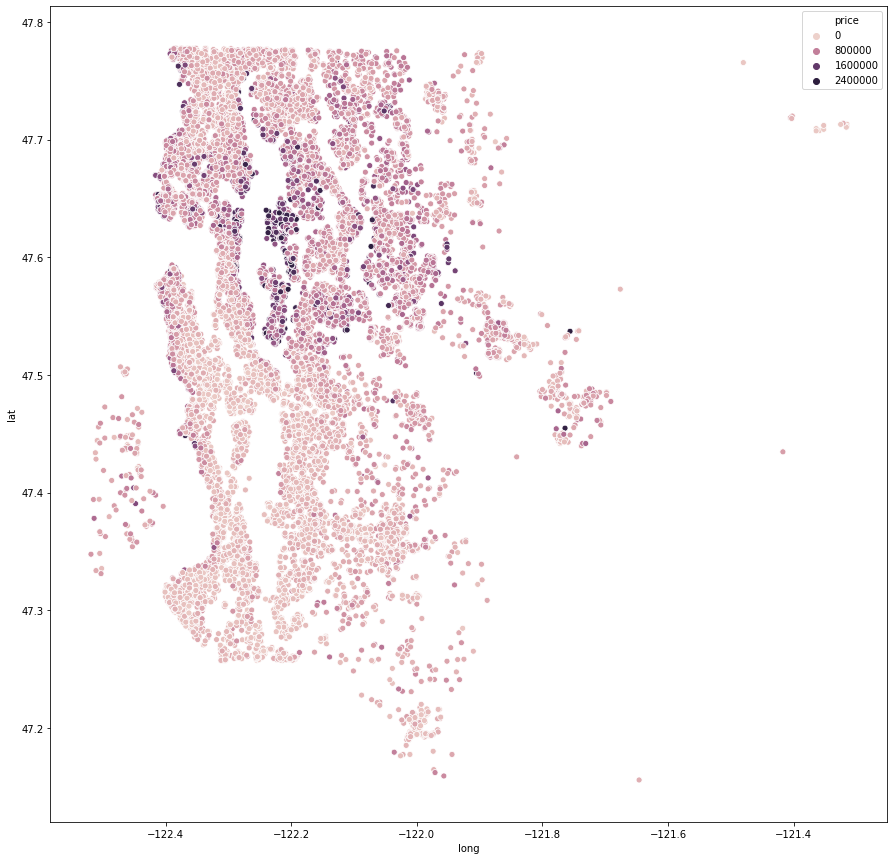

In [130]:
plt.figure(figsize= (15,15))

sns.scatterplot(x='long', y ='lat', data=df,hue='price')

# Distance From City (Seattle or Bellevue) vs House Price

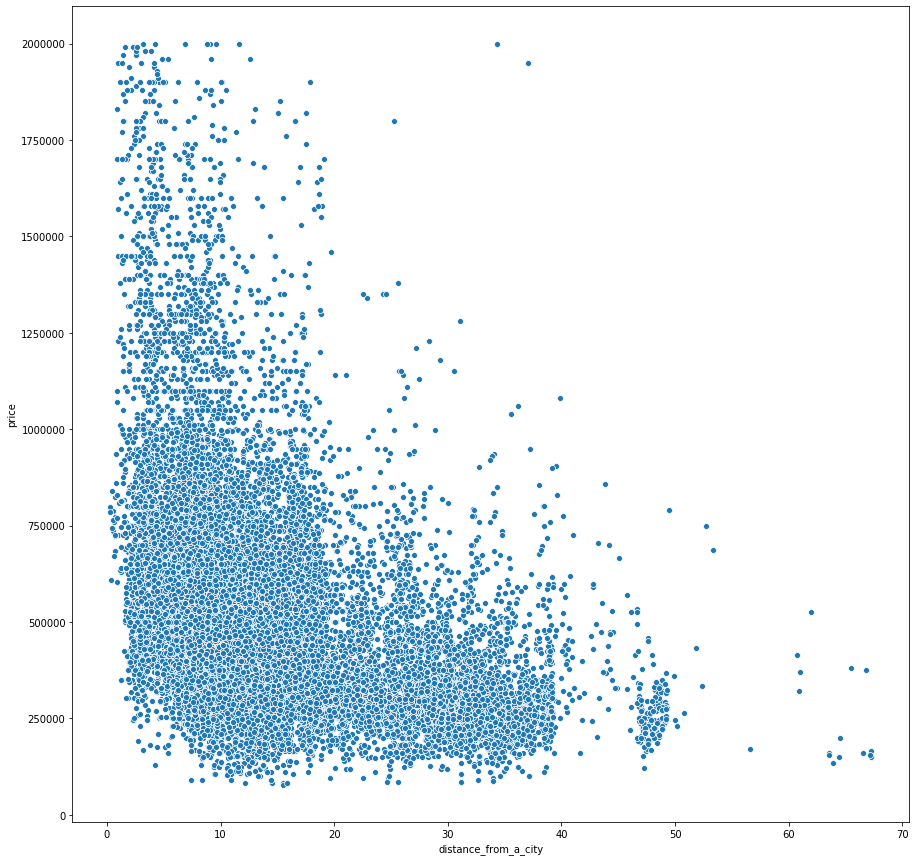

In [124]:
plt.figure(figsize= (15,15))
sns.scatterplot(x='distance_from_a_city', y='price',data=df)
plt.show()

# Distance From International Airport vs House Price


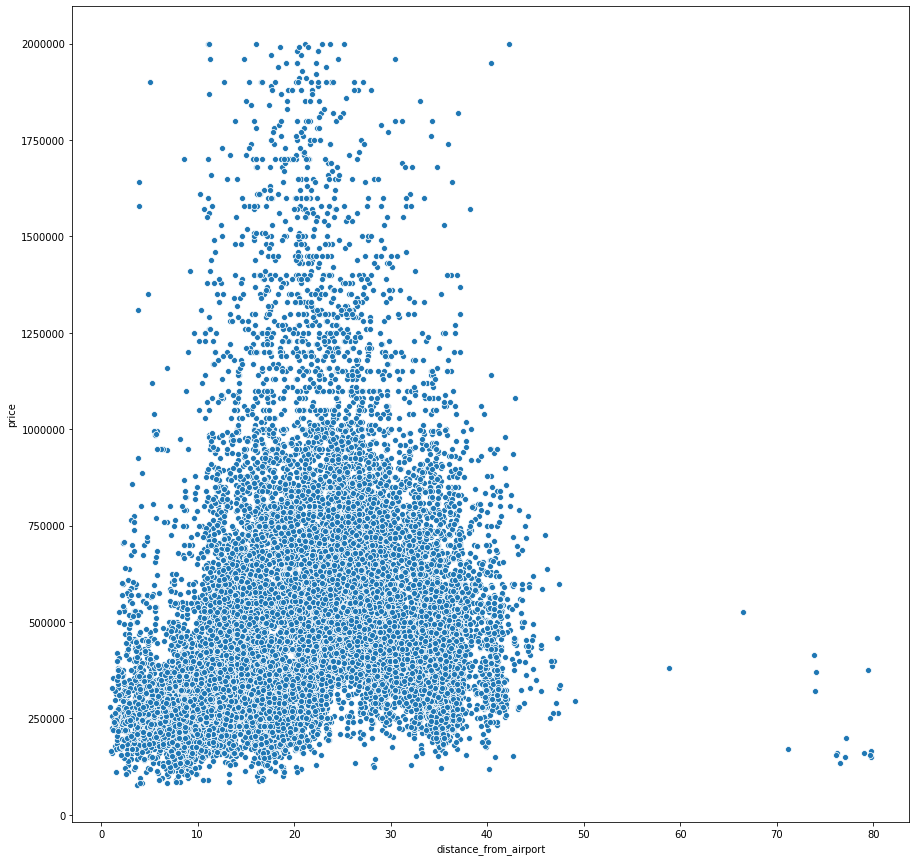

In [114]:
plt.figure(figsize= (15,15))
sns.scatterplot(x='distance_from_airport', y='price',data=df)
plt.show()

**The house prices are cheapest from 0 -10km, then increase from 10 to 30 before decreasing again**

This is as expected
* Too close to aiport and noise drives prices down
* Too far from aiport - 30+km also drive down price
* Sweet spot seems to be between 10 and 30 km

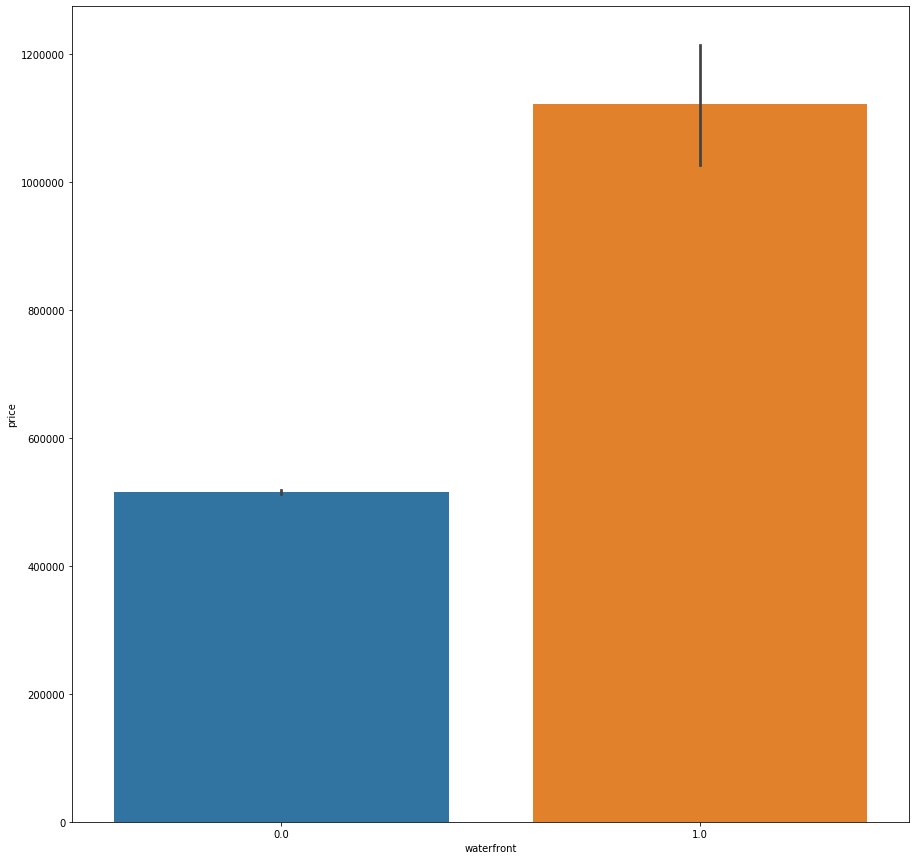

In [115]:
plt.figure(figsize= (15,15))
sns.barplot(x='waterfront', y='price',data=df)
plt.show()

# Age of House vs Price

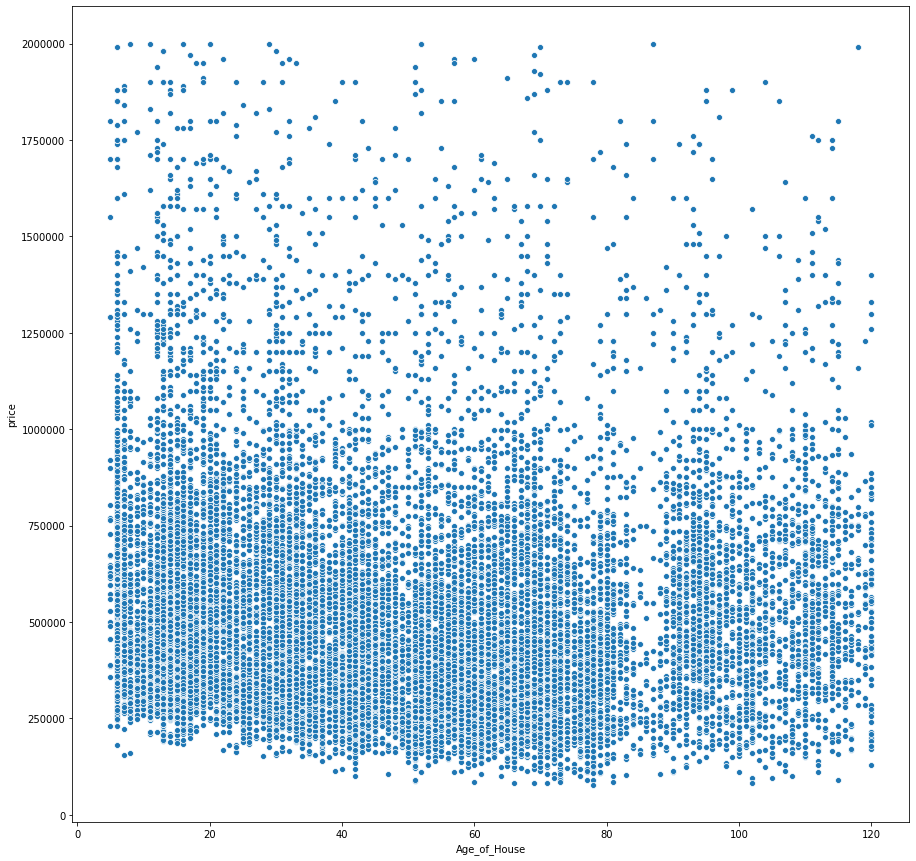

In [116]:
plt.figure(figsize= (15,15))
sns.scatterplot(x='Age_of_House', y='price',data=df)
plt.show()

# Last Renovated vs House Price

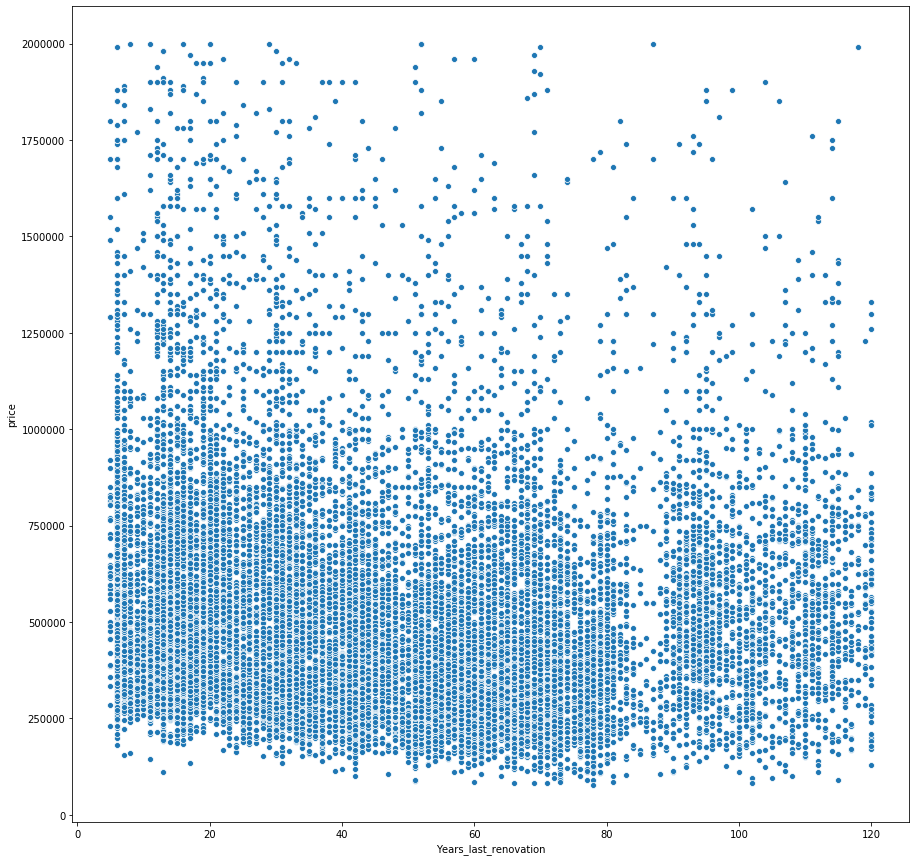

In [117]:
plt.figure(figsize= (15,15))
sns.scatterplot(x='Years_last_renovation', y='price',data=df)
plt.show()

# 10 Cheapest Zipcodes by House Price

In [118]:
import matplotlib as mpl

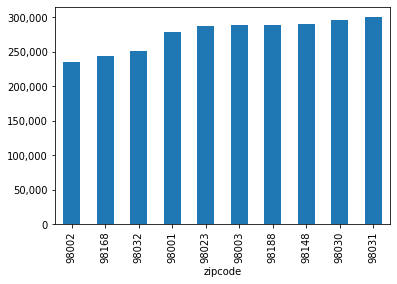

In [119]:
ax = df.groupby('zipcode')['price'].mean().sort_values(ascending = True)[:10].plot(kind='bar')

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

# 10 Expensive Zipcodes by House Price

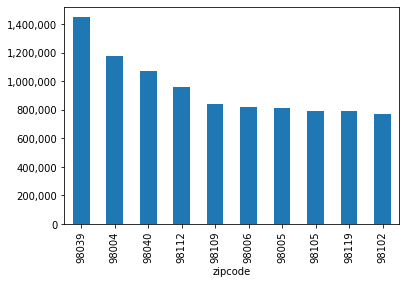

In [120]:
ax = df.groupby('zipcode')['price'].mean().sort_values(ascending = False)[:10].plot(kind='bar')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

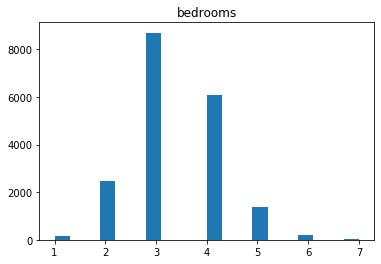

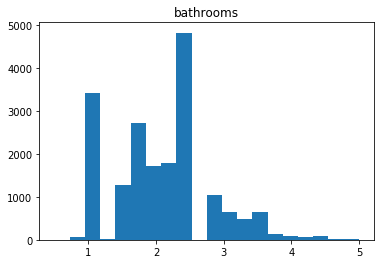

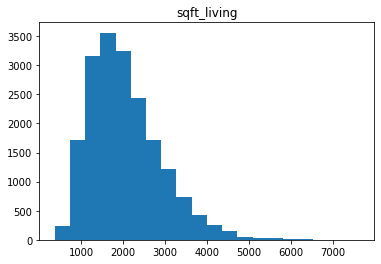

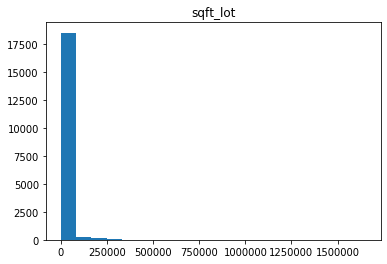

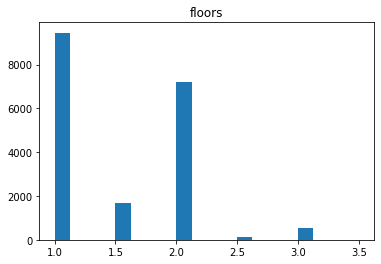

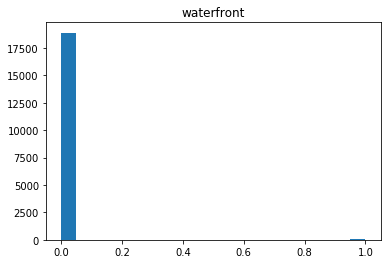

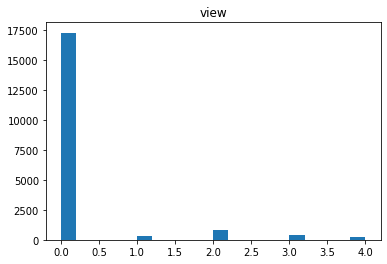

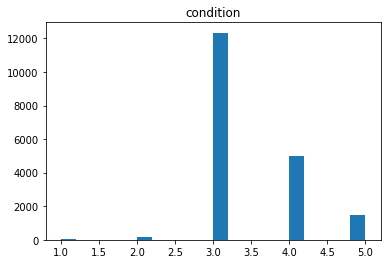

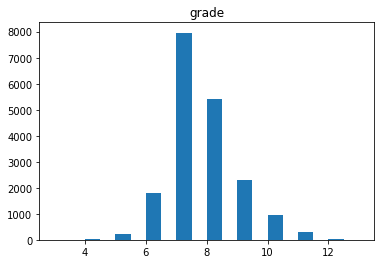

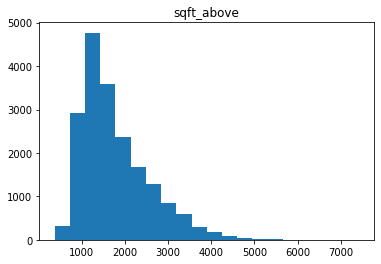

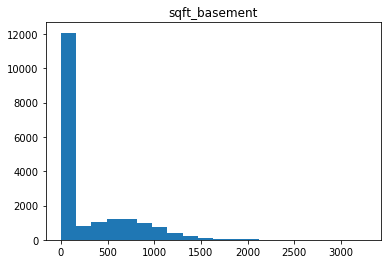

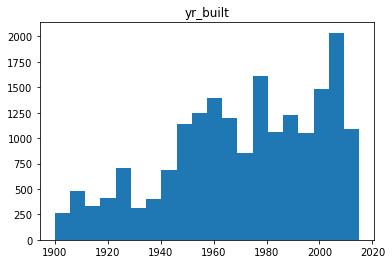

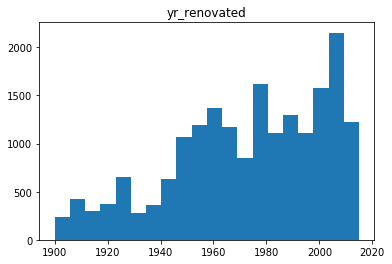

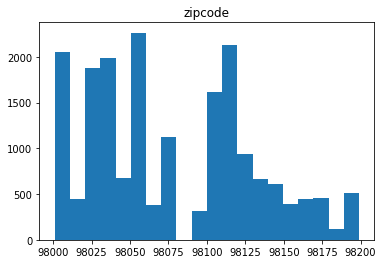

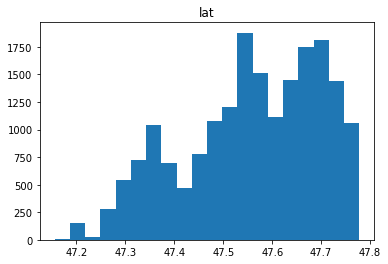

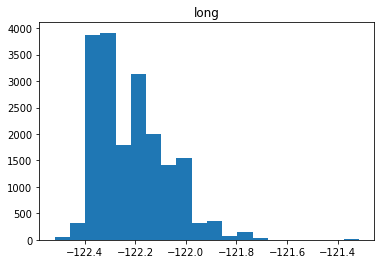

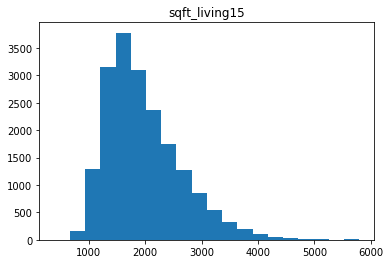

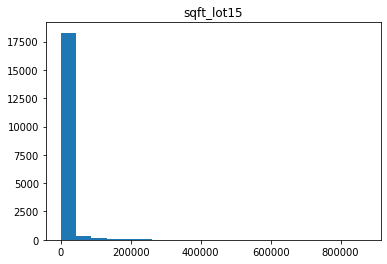

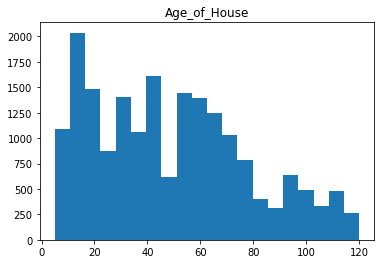

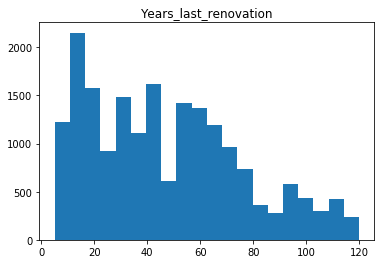

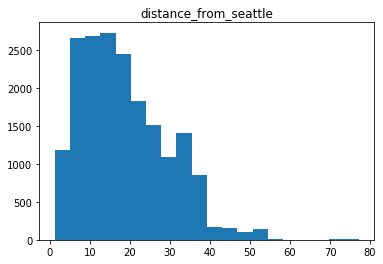

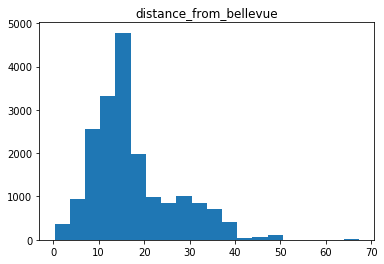

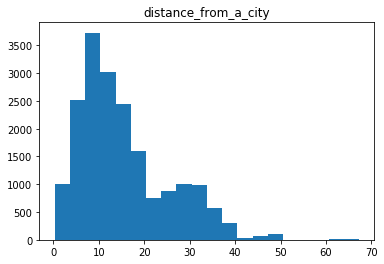

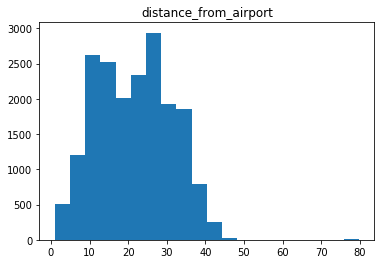

In [121]:
for col in numerical_cols:
    plt.hist(df[col], bins=20)
    plt.title(col)
    plt.show()


**From the above histogram can see a view of the columns should be categorical**

In [122]:
categoricals = ['floors','view','condition','grade','waterfront','basement','zipcode']

# Viewing Categorical Variables

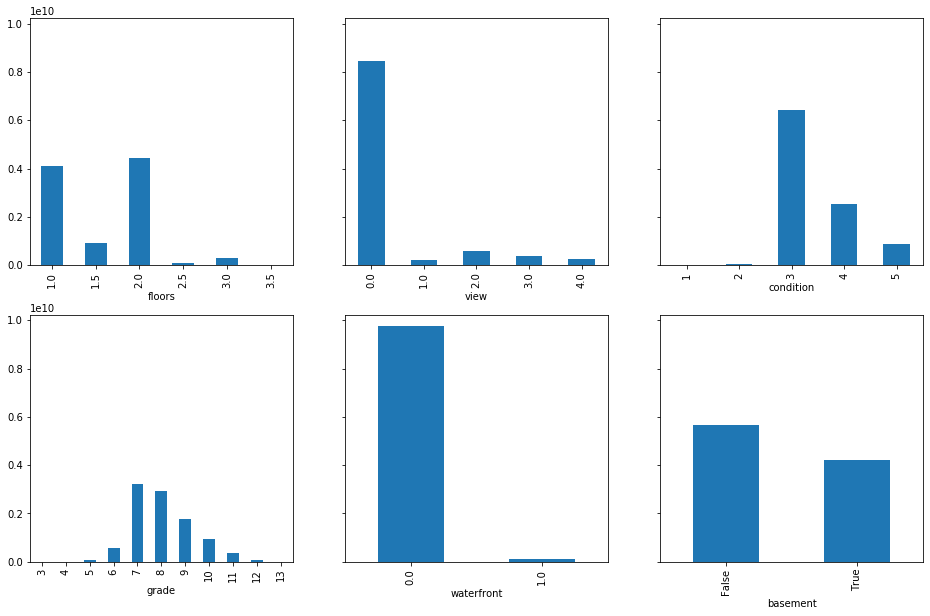

In [123]:

# Create bar plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10), sharey=True)
for xcol, ax in zip(categoricals, axes.flatten()):
    df.groupby(xcol)['price'].sum().plot(kind='bar',ax=ax)
#     df.groupby(xcol)['price'].mean().plot(kind='bar',ax=ax,)


In [47]:
# PLotting ZIpcodes by price

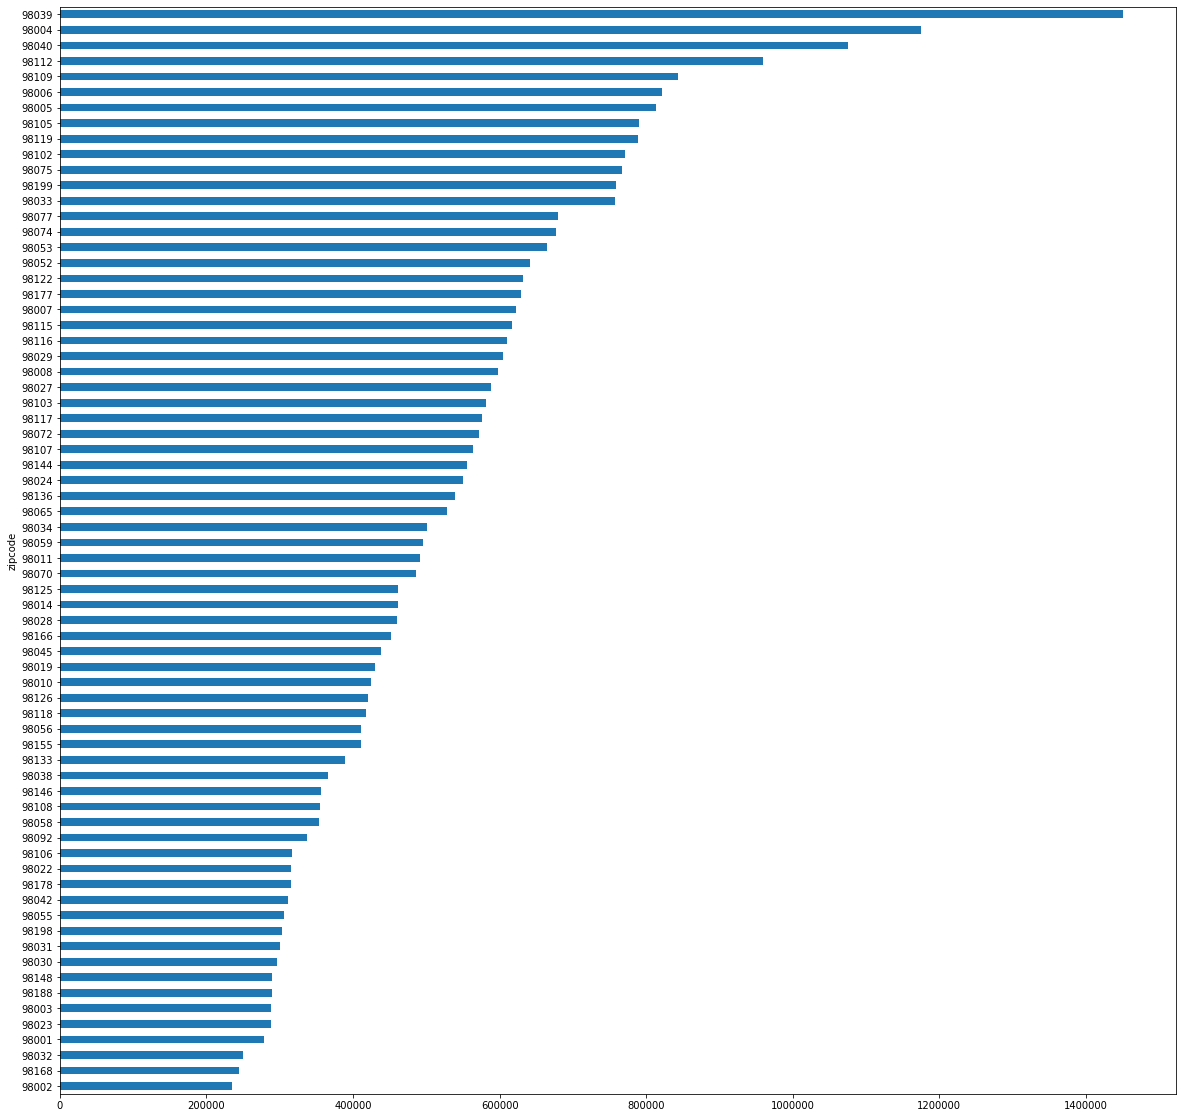

In [48]:
plt.figure(figsize=(20,20))
df.groupby('zipcode')['price'].mean().sort_values().plot(kind='barh')

In [49]:
df['waterfront'].value_counts()

0.0    18899
1.0      103
Name: waterfront, dtype: int64

In [52]:
numericals = ['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_living15',
 'sqft_lot15',
 'Age_of_House',
 'Years_last_renovation',
 'distance_from_a_city',
 'distance_from_airport']

# Correlation between Variables

In [53]:
corr = df[numericals].corr()

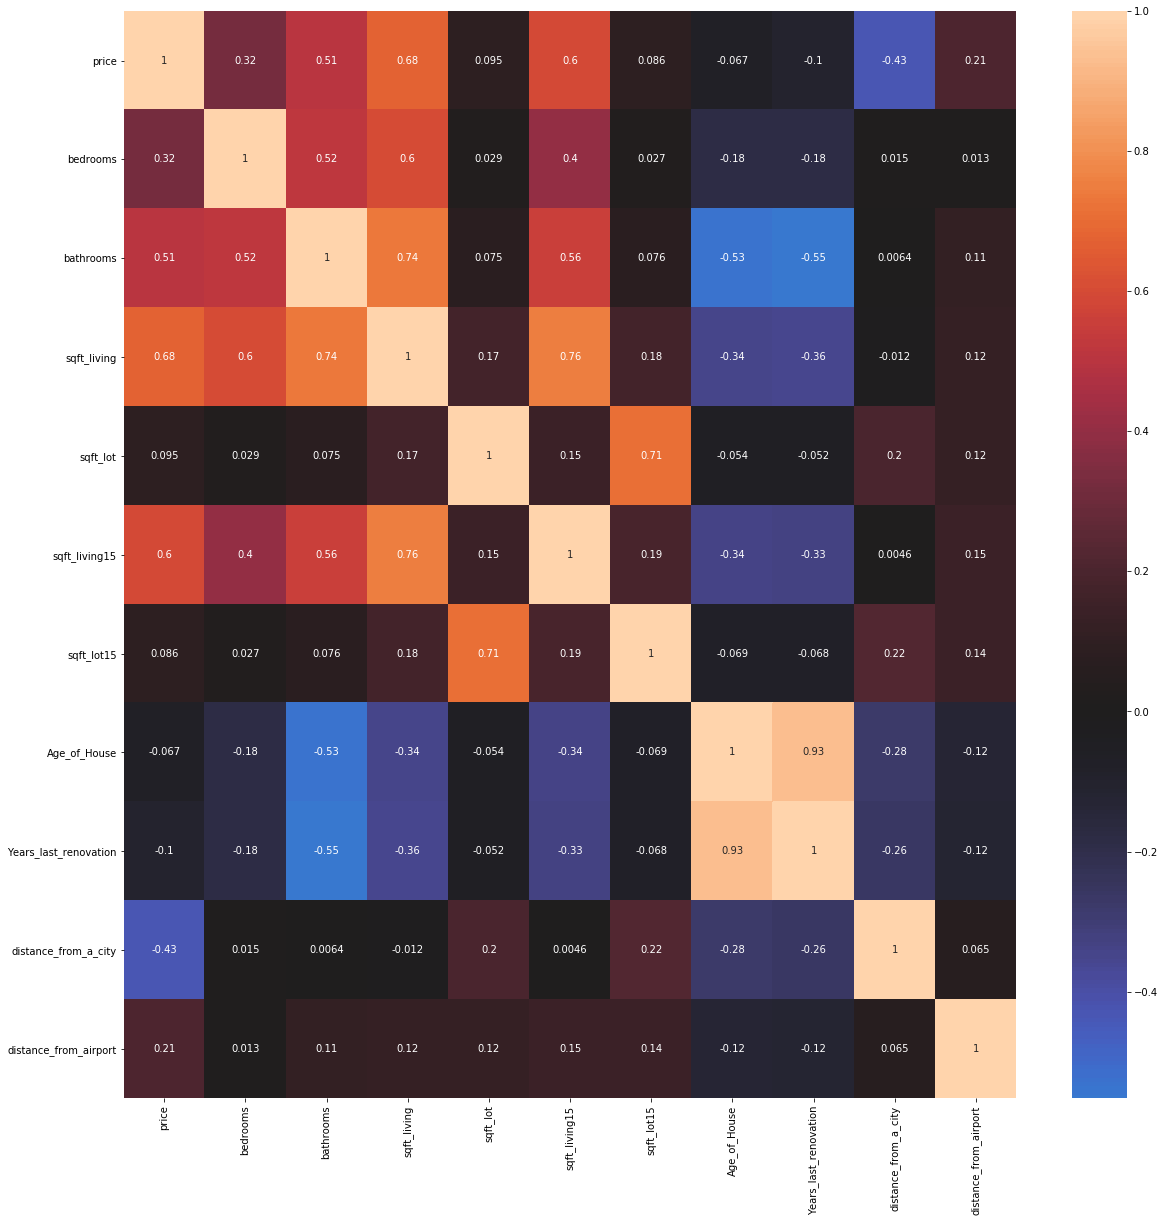

In [54]:
# Your code here
plt.figure(figsize=(20,20))
sns.heatmap(corr, center=0, annot=True);
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

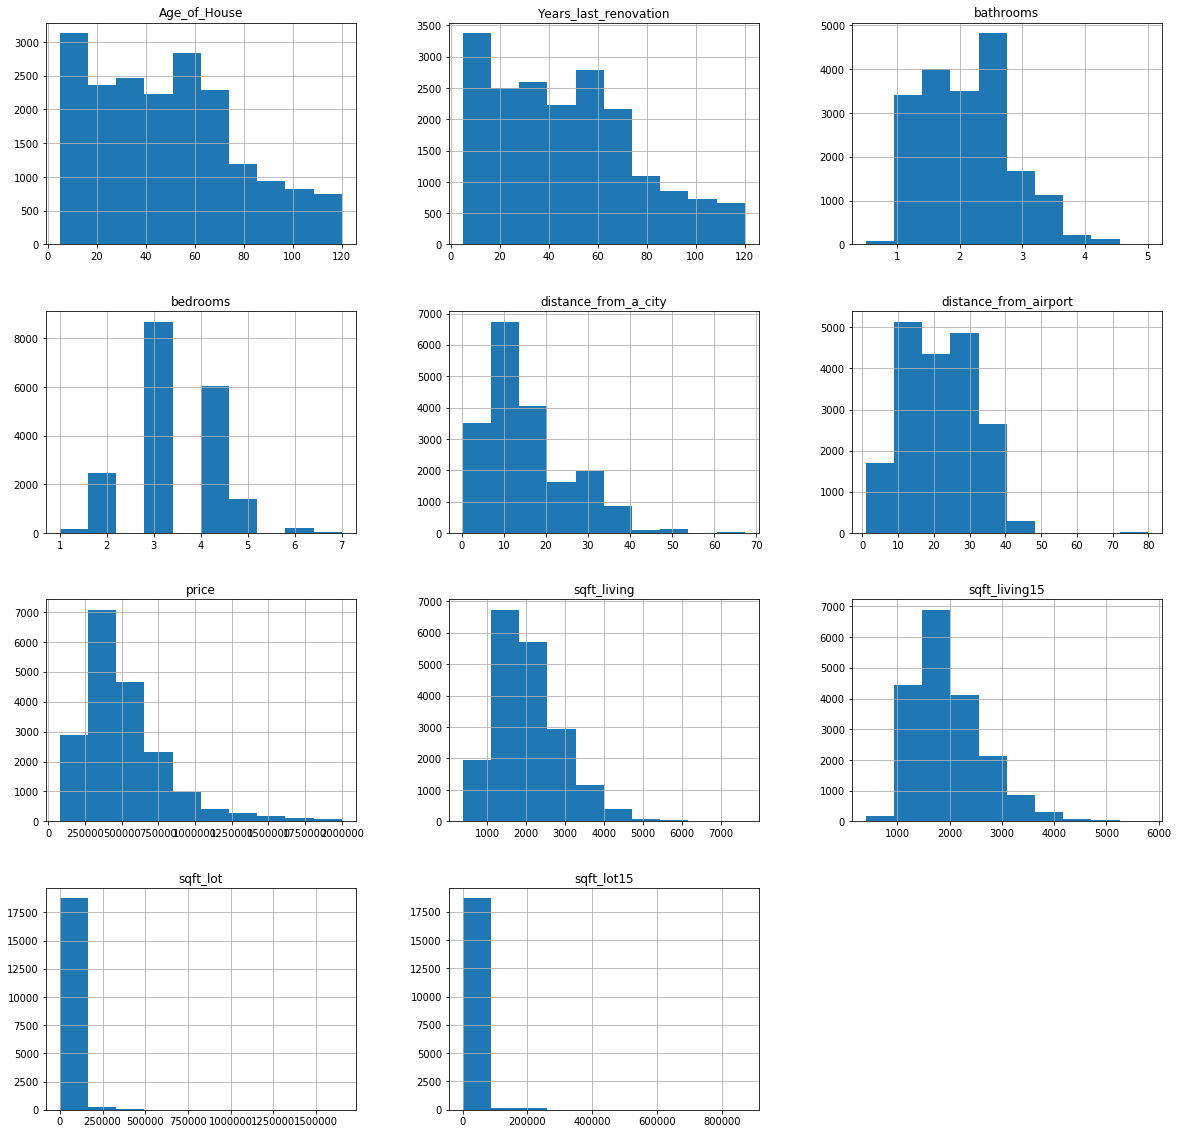

In [55]:
df_cont = df[numericals]
df_cont.head()
df_cont.hist(figsize = (20,20))
plt.show()

In [59]:
totransform = ['bathrooms','bedrooms','distance_from_a_city','sqft_living','sqft_living15',
             'sqft_lot','sqft_lot15']
df_transform = df[totransform]


In [60]:
import numpy as np

In [61]:
df['bathroomlog'] = np.log(df['bathrooms'])

In [62]:
numericals.remove('price')

In [63]:
numericals

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_living15',
 'sqft_lot15',
 'Age_of_House',
 'Years_last_renovation',
 'distance_from_a_city',
 'distance_from_airport']

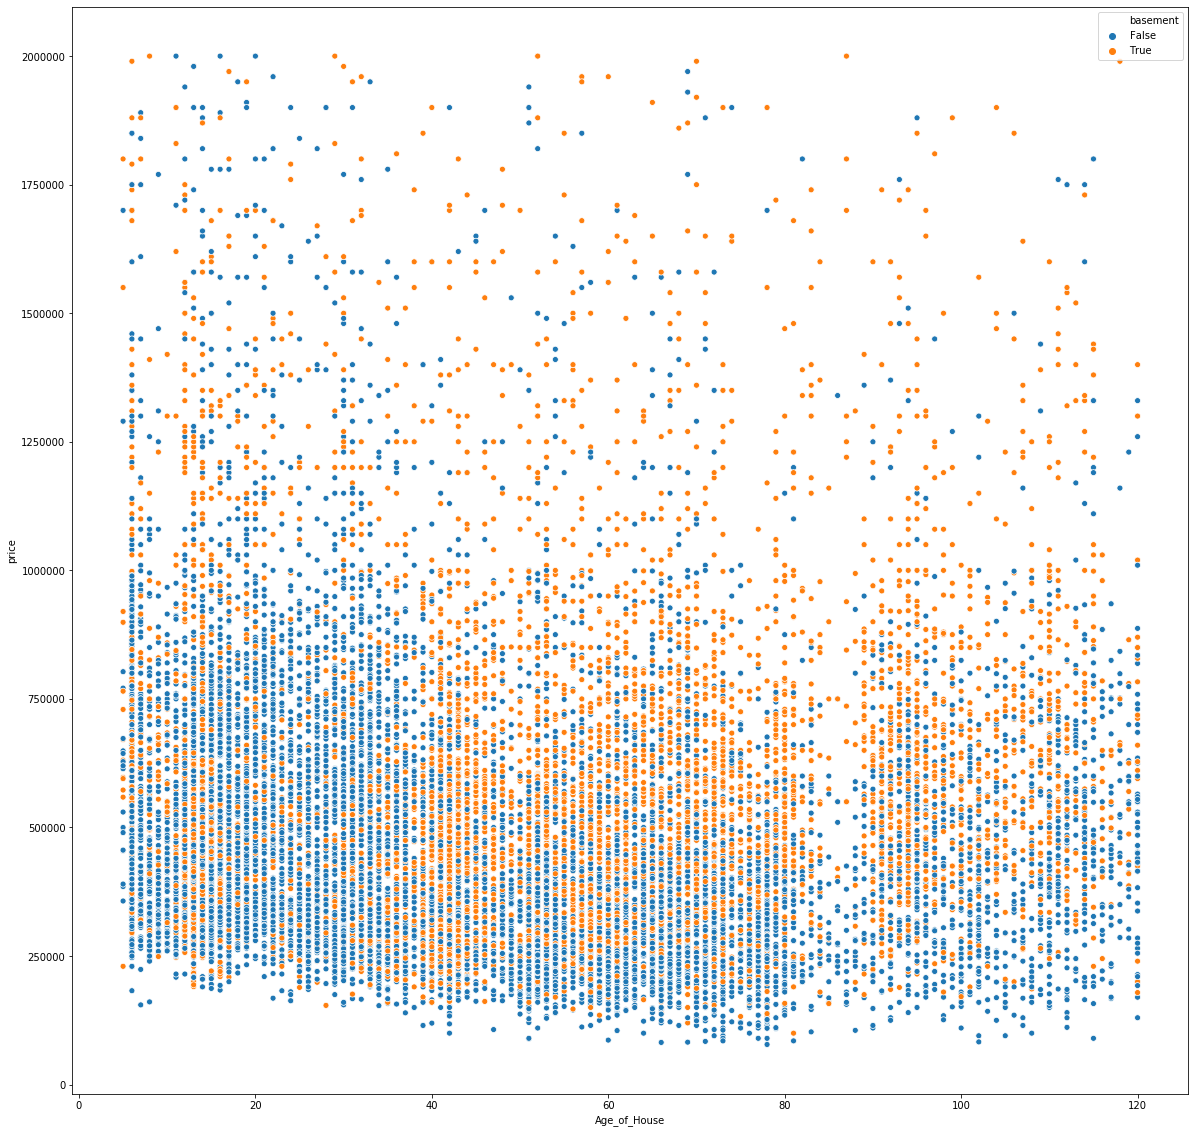

In [64]:
plt.figure(figsize=(20,20))
sns.scatterplot(y='price',x='Age_of_House',data=df,hue='basement')

In [65]:
dftop1000 = df.sort_values(by='price',ascending = False)[:1000]

In [66]:
df['zipcode'].value_counts()

98103    538
98038    528
98115    514
98052    505
98117    495
        ... 
98010     87
98102     83
98024     73
98148     51
98039     27
Name: zipcode, Length: 70, dtype: int64

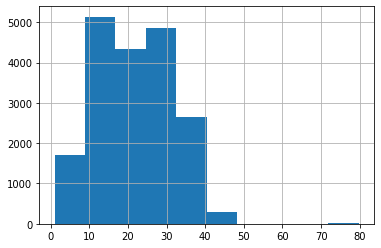

In [67]:
df['distance_from_airport'].hist()

In [68]:
airport = df['distance_from_airport']

In [71]:
df['distance_from_airport']

1        30.859494
2        33.112379
3        10.988905
4        27.230991
5        32.449837
           ...    
21591    16.906717
21592    28.614456
21593     8.730896
21594    16.764856
21596    16.731520
Name: distance_from_airport, Length: 19002, dtype: float64

In [73]:

dfzip = df.groupby('zipcode')['price'].agg(['mean','median','count'])

In [74]:
dfzip.reset_index(inplace = True)

In [75]:
dfzip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
zipcode    70 non-null int64
mean       70 non-null float64
median     70 non-null float64
count      70 non-null int64
dtypes: float64(2), int64(2)
memory usage: 2.3 KB


In [76]:
dfzip['mean'] = dfzip['mean'].astype('int64')
dfzip['median'] = dfzip['median'].astype('int64')

In [77]:
df.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot  \
price                   1.000000  0.322691   0.505899     0.678364  0.094727   
bedrooms                0.322691  1.000000   0.520397     0.600524  0.028582   
bathrooms               0.505899  0.520397   1.000000     0.738212  0.074823   
sqft_living             0.678364  0.600524   0.738212     1.000000  0.169348   
sqft_lot                0.094727  0.028582   0.074823     0.169348  1.000000   
floors                  0.280723  0.180692   0.512206     0.357607 -0.010085   
waterfront              0.155235 -0.023418   0.019616     0.038067  0.021330   
view                    0.346082  0.068160   0.145820     0.237098  0.064978   
condition               0.037808  0.020746  -0.133071    -0.064883 -0.012780   
grade                   0.681265  0.364399   0.651109     0.749883  0.109481   
zipcode                -0.044324 -0.161316  -0.206696    -0.203997 -0.130068   
sqft_living15           0.599255  0.403213   0.556496     0.756184  0.147631   
sqft_lot15              0.085810  0.027468   0.075751     0.180517  0.714532   
Age_of_House           -0.066510 -0.176589  -0.531114    -0.342986 -0.053957   
Years_last_renovation  -0.104688 -0.182475  -0.552425    -0.357608 -0.051884   
basement                0.170285  0.149400   0.147716     0.185291 -0.037994   
distance_from_seattle  -0.312331  0.078389   0.104015     0.105204  0.246331   
distance_from_bellevue -0.451783 -0.045956  -0.045558    -0.082917  0.180996   
distance_from_a_city   -0.431322  0.014756   0.006375    -0.012303  0.203281   
distance_from_airport   0.206271  0.012719   0.110850     0.119555  0.124073   
decades                -0.067047 -0.176718  -0.527264    -0.341680 -0.052573   
bathroomlog             0.463297  0.516395   0.976007     0.704998  0.066333   

                          floors  waterfront      view  condition     grade  \
price                   0.280723    0.155235  0.346082   0.037808  0.681265   
bedrooms                0.180692   -0.023418  0.068160   0.020746  0.364399   
bathrooms               0.512206    0.019616  0.145820  -0.133071  0.651109   
sqft_living             0.357607    0.038067  0.237098  -0.064883  0.749883   
sqft_lot               -0.010085    0.021330  0.064978  -0.012780  0.109481   
floors                  1.000000    0.008586  0.014074  -0.268428  0.459285   
waterfront              0.008586    1.000000  0.360318   0.015337  0.034261   
view                    0.014074    0.360318  1.000000   0.042049  0.206946   
condition              -0.268428    0.015337  0.042049   1.000000 -0.153541   
grade                   0.459285    0.034261  0.206946  -0.153541  1.000000   
zipcode                -0.060220    0.046395  0.094366  -0.002191 -0.186401   
sqft_living15           0.277175    0.044538  0.246492  -0.100781  0.702541   
sqft_lot15             -0.014618    0.029648  0.064074  -0.003648  0.115580   
Age_of_House           -0.499753    0.037609  0.061021   0.360215 -0.463654   
Years_last_renovation  -0.508053    0.019179  0.035158   0.387753 -0.471079   
basement               -0.258927    0.024755  0.163681   0.126591  0.033567   
distance_from_seattle   0.008889   -0.003508 -0.067712  -0.069081  0.023356   
distance_from_bellevue -0.033180    0.013528 -0.032124  -0.041185 -0.147142   
distance_from_a_city   -0.038997    0.006273 -0.055999  -0.048415 -0.096851   
distance_from_airport   0.113479   -0.047746 -0.043669  -0.063764  0.156082   
decades                -0.497740    0.037809  0.061282   0.359780 -0.459553   
bathroomlog             0.502868    0.014746  0.128329  -0.117399  0.633511   

                        ...  sqft_lot15  Age_of_House  Years_last_renovation  \
price                   ...    0.085810     -0.066510              -0.104688   
bedrooms                ...    0.027468     -0.176589              -0.182475   
bathrooms               ...    0.075751     -0.531114              -0.552425   
sqft_living             ...    0.180517     -0.3

In [78]:
dfzip

zipcode     mean   median  count
0     98001   278733   259450    328
1     98002   234927   235000    178
2     98003   288682   264000    255
3     98004  1175578  1050000    250
4     98005   813864   772325    158
..      ...      ...      ...    ...
65    98177   629600   554000    229
66    98178   315560   280000    233
67    98188   288903   265000    119
68    98198   302883   266250    242
69    98199   758876   671000    271

[70 rows x 4 columns]

# Linearity

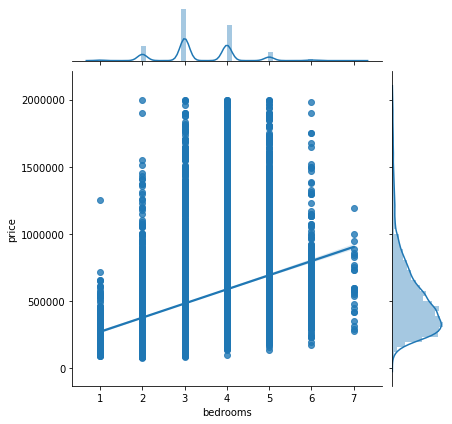

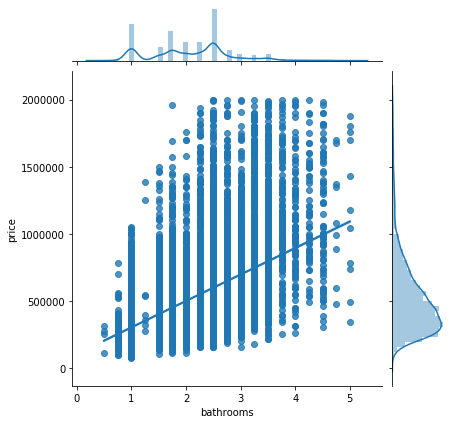

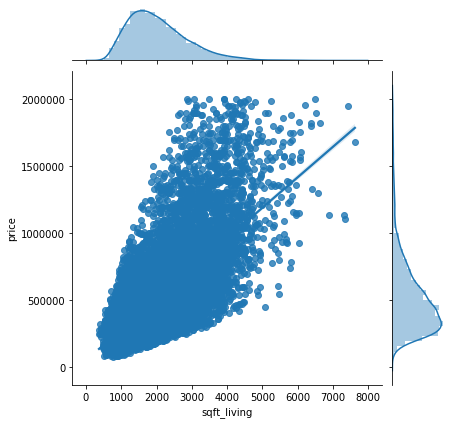

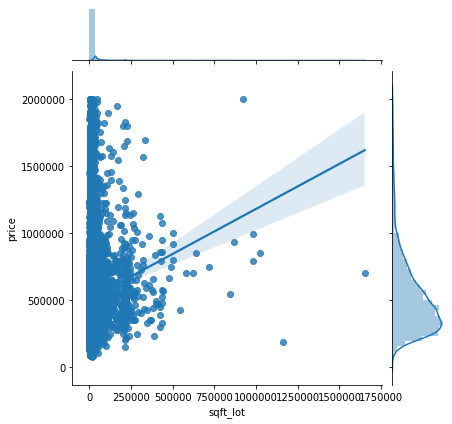

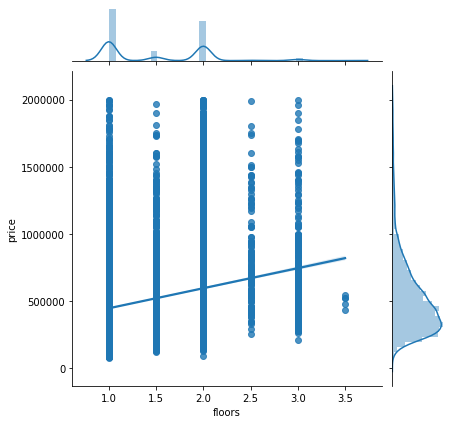

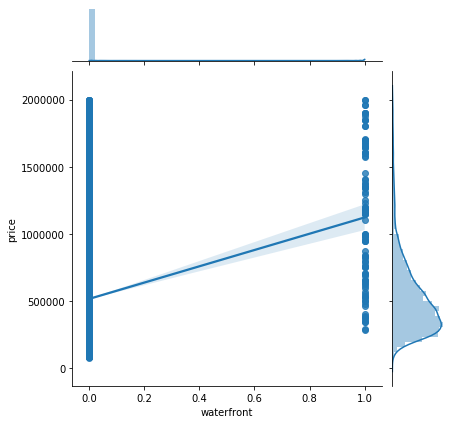

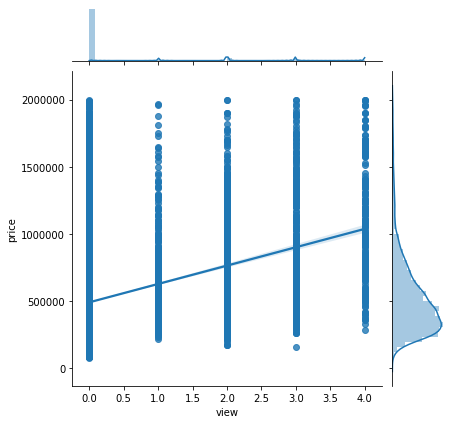

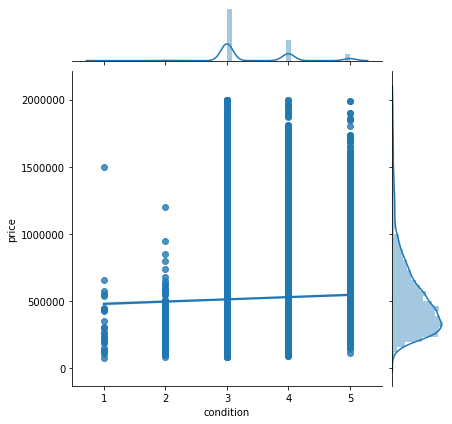

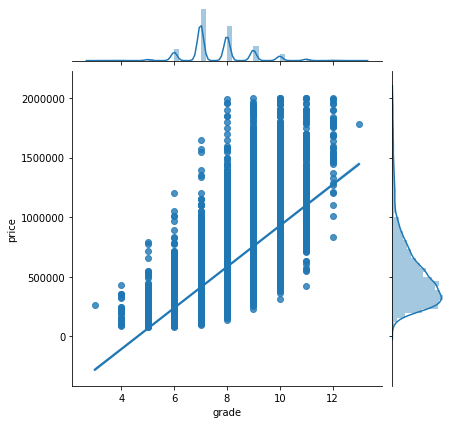

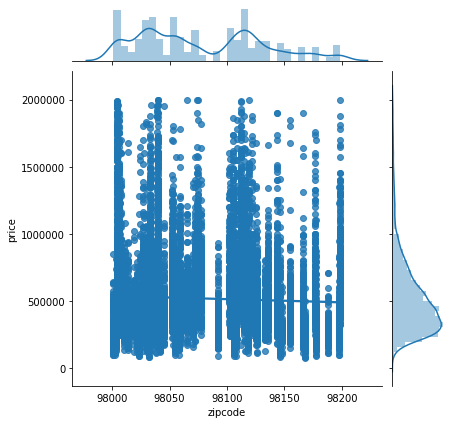

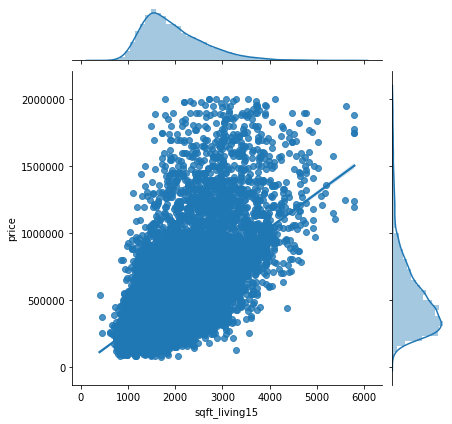

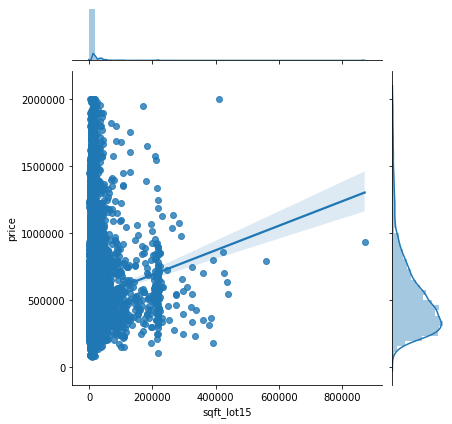

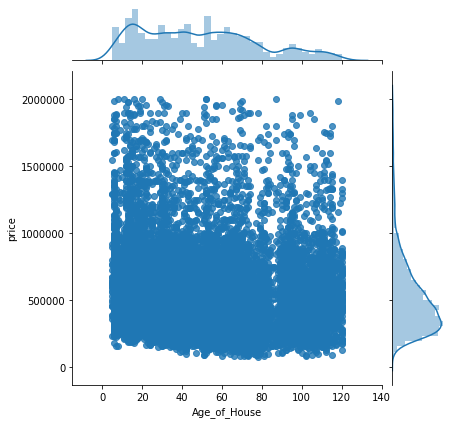

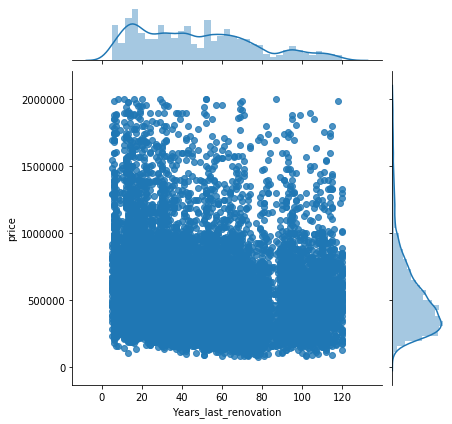

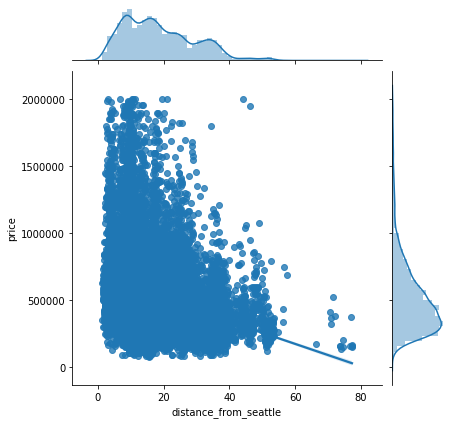

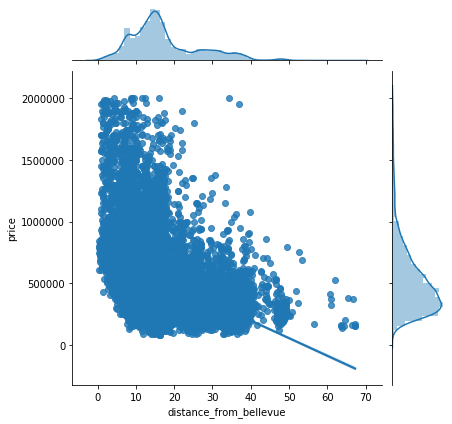

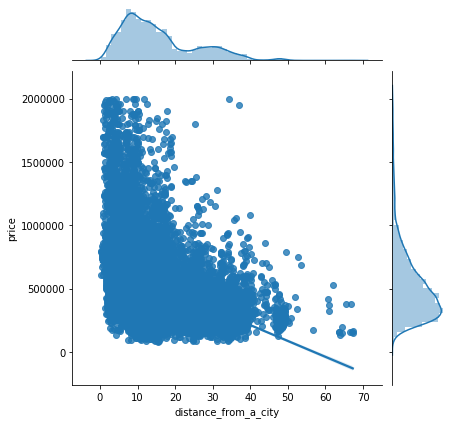

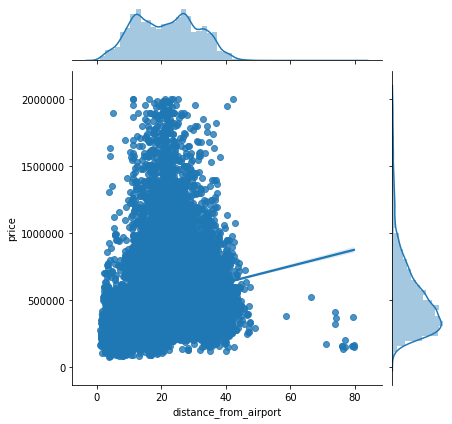

In [79]:
for col in numerical_cols:
    sns.jointplot(x = col,y ='price',data=df, kind='reg')